Tyler Beaulieu  
DS5010, Fall 2024   
October 21, 2024  

<h4 style="text-align:center;">Homework 5</h4>

In [33]:
#Import Pandas and Numpy
import pandas as pd
import numpy as np

## Problem 1: Combine Dataframes

1. (2 pt) Create the following two dataframes and display the dataframes.
<img src="Files/fig1.png" width="100"> <img src="Files/fig2.png" width="100">

In [34]:
data1 = {'Id': [1,2,3,4], 
         'Value1':['A','B','C','D']}

data2 = {'Id': [1,3,5], 
         'Value2':['E','F','G']}

df1 = pd.DataFrame(data1,index=['X','Y','Z','W'])
df1

,Id,Value1
X,1,A
Y,2,B
Z,3,C
W,4,D


In [35]:
df2 = pd.DataFrame(data2,index=['X','Z','Q'])
df2

,Id,Value2
X,1,E
Z,3,F
Q,5,G


2. (6 pt) Merge two dataframe in question 1 based on the common column "Id". Display the resulting dataframe. (use the default value of argument `how`)

In [36]:
df_merge = pd.merge(df1,df2,on="Id")
df_merge

,Id,Value1,Value2
0,1,A,E
1,3,C,F


3. (6 pt)  **Outer** merge two dataframe in question 1 on **index**. Display the new dataframe.

In [37]:
df_merge = pd.merge(df1,df2,how="outer",left_index=True, right_index=True)
df_merge

,Id_x,Value1,Id_y,Value2
Q,NaN,NaN,5.0,G
W,4.0,D,NaN,NaN
X,1.0,A,1.0,E
Y,2.0,B,NaN,NaN
Z,3.0,C,3.0,F


4. (6 pt) Create the following dataframe, df4, and display this dataframe. Fill null values in the resulting dataframe in question 3 with non-null values from df4. Display the resulting dataframe.(Hint: [.combine_first()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.combine_first.html#pandas.DataFrame.combine_first))
<img src="Files/fig3.png" width="200">

In [38]:
data4 = {'Id_x':[0,1,2,3,4],
        'Value1':['A','B','C','D','E'],
        'Id_y':[0,1,2,3,4],
        'Value2':['A','B','C','D','E']}

df4=pd.DataFrame(data4,index=['Q','W','X','Y','Z'])
df_merge = df_merge.combine_first(df4)
df_merge

,Id_x,Value1,Id_y,Value2
Q,0.0,A,5.0,G
W,4.0,D,1.0,B
X,1.0,A,1.0,E
Y,2.0,B,3.0,D
Z,3.0,C,3.0,F


---------------------------

## Problem 2: Combine three Dataframes

1. Create the following dataframes and use these dataframes to solve the next two questions.
<img src="Files/fig4.png" width="500">

In [39]:

# Create df1
data1 = {'ID1': [1, 2, 3],
         'ID2': [101, 102, 103],
         'Value1': ['A', 'B', 'C']}
df1 = pd.DataFrame(data1)

# Create df2
data2 = {'ID1': [2, 3, 4],
         'ID2': [102, 103, 104],
         'Value2': ['X', 'Y', 'Z']}
df2 = pd.DataFrame(data2)

# Create df3
data3 = {'ID3': [101, 102, 103],
         'Value3': ['Apple', 'Banana', 'Cherry']}
df3 = pd.DataFrame(data3)



2. (10 pt) Can we concatenate three DataFrames into one Dataframe using the `pd.concat` function **in one step** ? Try to display the concatenated dataframe. (Hint: using the `pd.concat` function with default arguments. Don't provide any additional arguments to `pd.concat'.)

In [40]:
pd.concat((df1,df2,df3))

,ID1,ID2,Value1,Value2,ID3,Value3
0,1.0,101.0,A,NaN,NaN,NaN
1,2.0,102.0,B,NaN,NaN,NaN
2,3.0,103.0,C,NaN,NaN,NaN
0,2.0,102.0,NaN,X,NaN,NaN
1,3.0,103.0,NaN,Y,NaN,NaN
2,4.0,104.0,NaN,Z,NaN,NaN
0,NaN,NaN,NaN,NaN,101.0,Apple
1,NaN,NaN,NaN,NaN,102.0,Banana
2,NaN,NaN,NaN,NaN,103.0,Cherry


3. (10 pt) Firstly merge df1 and df2 on mutilple keys('ID1','ID2') and then merges the result with df3 on different key columns ('ID2','ID3').\
(Hint: using two `pd.merge`. In the first `pd.merge`,you need to specify the keys using `on`. In the second `pd.merge` function, you need to explicitly specify the key columns using `left_on` and `right_on`.)

In [47]:
df12 = pd.merge(df1,df2,on=['ID1','ID2'])
df12

,ID1,ID2,Value1,Value2
0,2,102,B,X
1,3,103,C,Y


In [46]:
df123 = pd.merge(df12,df3,left_on='ID2',right_on='ID3')
df123

,ID1,ID2,Value1,Value2,ID3,Value3
0,2,102,B,X,102,Banana
1,3,103,C,Y,103,Cherry


------------------

## Problem 3 CSV-Part I Simple Groupby

1. (4 pt) Read from the attached planets.csv and print out the head of this dataframe using `.head()`. Use hash symbol, #, and **briefly** explain the data set and the meaning of each column.\


In [56]:
planets = pd.read_csv('Files/planets.csv')
planets.head()
#Data set shows details about exoplanets founds, such as the year, the method of discovery, and details about the planet.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


**Each question in the following should have no more than 2 lines of code.**\
2. (4 pt) Drop rows with missing values(`inplace =False`) and then use `.describe()` to show a summary of the data statistics.

In [58]:
planets = planets.dropna(inplace=False)
planets.describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


3. (4 pt) Display the median of orbital period for each method.

In [61]:
planets.groupby('method').median()

,number,orbital_period,mass,distance,year
method,,,,,
Radial Velocity,1.0,358.00000,1.24,39.56,2009.0
Transit,1.0,2.70339,1.47,178.00,2013.0


4. (4 pt) Display the average number of planets discovered per year.

In [69]:
planets.groupby('year')[['number']].mean()

,number
year,
1989,1.000000
1995,1.000000
1996,3.250000
1997,1.000000
1998,2.200000
1999,1.642857
2000,1.571429
2001,1.272727
2002,1.451613


**Each question in the following should have no more than 4 lines of code.**\
5. (4 pt) Add a new column called 'decade' and it indicates the decade in which the planet was discovered. Find the proper value of decade for each row. Display the total number of planets discovered **in each decade** since 1900.\
(Hint: Using operations on existing columns to add a new column. Then use a boolean mask to select data in which the planet was discovered greater than or equal to 1980. Then use a groupby function.)

In [93]:
planets['decade'] = planets['year'].map(lambda d: str(d)[0:3]+'0s')
planet_bool = planets['year'] >= 1990
planets[planet_bool == True].groupby('decade')['number'].sum()

decade
1990s     49
2000s    439
2010s    375
Name: number, dtype: int64

------------------------------------

## Problem 4 CSV-Part II Groupby with agg., transform, filter and idxmax.

Using the same csv file (planets.csv) in problem 3 to solve the following questions:\
**Each question in the following should have no more than 4 lines of code.**
1. (5 pt) Display all methods that had more than 900 planets being discovered.

In [121]:
planets = pd.read_csv('Files/planets.csv')
planets.groupby('method')['number'].sum()[planets.groupby('method')['number'].agg(lambda x: x.sum() > 900)]

method
Radial Velocity    952
Name: number, dtype: int64

2. (5 pt) Display the maximum and minimum orbital period for planets discovered by each method. (Hint: groupby and aggregate)

In [126]:
planets.groupby('method')['orbital_period'].agg(lambda x: str('Max: ')+str(x.max())+str(' Min: ')+str(x.min()))

method
Astrometry                             Max: 1016.0 Min: 246.36
Eclipse Timing Variations            Max: 10220.0 Min: 1916.25
Imaging                             Max: 730000.0 Min: 4639.15
Microlensing                           Max: 5100.0 Min: 1825.0
Orbital Brightness Modulation    Max: 1.54492875 Min: 0.240104
Pulsar Timing                     Max: 36525.0 Min: 0.09070629
Pulsation Timing Variations            Max: 1170.0 Min: 1170.0
Radial Velocity                      Max: 17337.5 Min: 0.73654
Transit                              Max: 331.60059 Min: 0.355
Transit Timing Variations              Max: 160.0 Min: 22.3395
Name: orbital_period, dtype: object

3. (5 pt) Create a new column called "numbers_each_years" and this indicates the cumulative number of planets discovered each year. Display the first 10 lines of the new dataframe. \
(Hint: using groupby and transform)

In [129]:
planets['numbers_each_years'] = planets.groupby('year')['number'].transform(lambda x: x.sum())
planets.head(10)

,method,number,orbital_period,mass,distance,year,numbers_each_years
0,Radial Velocity,1,269.300,7.10,77.40,2006,43
1,Radial Velocity,1,874.774,2.21,56.95,2008,120
2,Radial Velocity,1,763.000,2.60,19.84,2011,354
3,Radial Velocity,1,326.030,19.40,110.62,2007,65
4,Radial Velocity,1,516.220,10.50,119.47,2009,131
5,Radial Velocity,1,185.840,4.80,76.39,2008,120
6,Radial Velocity,1,1773.400,4.64,18.15,2002,46
7,Radial Velocity,1,798.500,NaN,21.41,1996,15
8,Radial Velocity,1,993.300,10.30,73.10,2008,120
9,Radial Velocity,2,452.800,1.99,74.79,2010,193


4. (5 pt) Display the maximum orbital period for planets discovered by each method. Which method has the longest orbital periods?

In [136]:
planets.groupby('method')['orbital_period'].max().sort_values(ascending=False)

method
Imaging                          730000.000000
Pulsar Timing                     36525.000000
Radial Velocity                   17337.500000
Eclipse Timing Variations         10220.000000
Microlensing                       5100.000000
Pulsation Timing Variations        1170.000000
Astrometry                         1016.000000
Transit                             331.600590
Transit Timing Variations           160.000000
Orbital Brightness Modulation         1.544929
Name: orbital_period, dtype: float64

In [137]:
print("Method with longest orbital periods:")
planets.groupby('method')['orbital_period'].max().sort_values(ascending=False).head(1)

Method with longest orbital periods:


method
Imaging    730000.0
Name: orbital_period, dtype: float64

-------------------------

## Problem 5 Dataframe Plot

Using the same csv file (planets.csv) in problem 3 to solve the following questions:(Hint: [pd.Series.plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas-series-plot))\
- plot requirements: 
- 1. should have one title 
- 2. should have xlabel and ylabel 
- 3. should have figsize 
- 4. should have grid line
- 5. should have legend
1. (10 pt) Display the total number of planets discovered in each year. Create a line plot of the number of planets discovered in each year. 

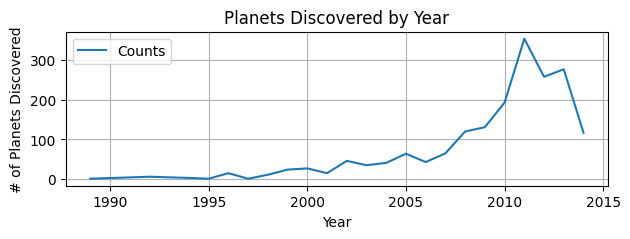

In [151]:
planet_count = planets.groupby('year')['number'].sum().plot(
    xlabel= 'Year', ylabel= '# of Planets Discovered', title='Planets Discovered by Year', grid=True, legend=True, figsize=(7,2))
planet_count.legend(['Counts'])

2. (10pt) Display the total number of planets discovered by each method. Create a bar plot of the number of planets discovered in each year. 

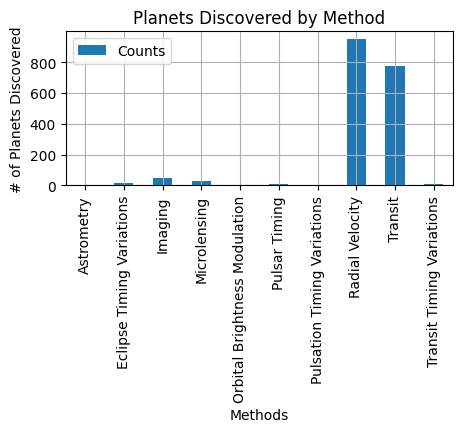

In [154]:
method_count = planets.groupby('method')['number'].sum().plot(
    kind='bar', xlabel= 'Methods', ylabel= '# of Planets Discovered', title= 'Planets Discovered by Method', grid= True, legend= True, figsize= (5,2)
)
method_count.legend(['Counts'])

# DONE